# **README**

This field plotter and potential plotter uses numpy arrays. This means when initializing the inputs you have take care that the inputs are infact nxm arrays and not nx, or ,xm arrays.

For example: When initializing the charges to go into the field/potential plotters into an array called q, you must index the array like q[0,i]. This is because q is an 1xn array. The same goes for the x positions (xq) and y-positions (yq) of the charges. If this is unclear, see HW1 of Computational Physics III.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
K = 9.0e9

def potential(x, y, q, xq, yq):
    phi = 0
    
    q = q.T

    #xq, yq must be 1-D array so that the proper concatenation works
    dx = -xq.T + x
    dy = -yq.T + y
    
    r = np.concatenate((dx, dy), axis = 1)
    dr = np.linalg.norm(r, axis = 1, keepdims = True)
        
    phi = np.sum(K*q/dr)
    
    return phi

def Efield(x, y, q, xq, yq):
    E = -1
    
    #Need to reshape everything from 1-D to D-1 arrays
    
    q = q.T
    
    dx = -xq.T + x
    dy = -yq.T + y
    
    r = np.concatenate((dx, dy), axis = 1)
    dr = np.linalg.norm(r, axis = 1, keepdims = True)
        
        
    E = np.sum(K*q*r/(dr**3), axis = 0)
    
    return E


R_MAX = 50.0 # limit the radius
PHI_0 = 1e6 # limit the potential
DS = 0.01 # target step size
D_PHI = 1e2 # limit the step
def compute_field_line(xi, yi,		# starting point
                       q, xq, yq,	# charges
                       direction):

    x = [xi]
    y = [yi]
    
    # Loop until the line is too far from the origin
    # or too close to a charge.
    
    while abs(potential(xi, yi, q, xq, yq)) < PHI_0 \
        and xi*xi+yi*yi < R_MAX*R_MAX: 
        
        # Compute the field.
        Ex,Ey = Efield(xi, yi, q, xq, yq)
        E = np.sqrt(Ex*Ex + Ey*Ey)

        # Choose the step length and limit the change in potential.   
        ds = DS
        if ds > D_PHI/E: ds = D_PHI/E

        # Take a step in the direction (or opposite) of the field.   
        xi += direction*ds*Ex/E
        yi += direction*ds*Ey/E

        x.append(xi)
        y.append(yi)

    return x, y

R_MAX = 1000.0 # limit the radius
DS = 0.01 # target step size
D_PHI = 1e2 # limit the step
Tolerance = .01
def compute_equipotential_line(xi, yi,		# starting point
                       q, xq, yq,	# charges
                       direction):
    
    paststartingpostion = False
    
    startx = xi
    starty = yi
    
    x = [xi]
    y = [yi]
    
    correctpotential = potential(xi, yi, q, xq, yq)
    # Loop until the line is too far from the origin
    # or too close to a charge.
    
    while (np.sqrt((xi - startx)**2 + (yi - starty)**2) > Tolerance \
        and xi*xi+yi*yi < R_MAX*R_MAX) or not paststartingpostion:
    
        # Compute the field.
        Ex,Ey = Efield(xi, yi, q, xq, yq)
        E = np.sqrt(Ex*Ex + Ey*Ey)

        # Choose the step length and limit the change in potential.
        ds = DS
        if ds > D_PHI/E: ds = D_PHI/E
            
        dx = -direction*ds*Ey/E
        dy = direction*ds*Ex/E
        
        xx = xi + dx
        yy = yi + dy
        Exx,Eyy = Efield(xx, yy, q, xq, yq)
        Exmean = 0.5*(Ex+Exx)
        Eymean = 0.5*(Ey+Eyy)
        E = np.sqrt(Exmean*Exmean + Eymean*Eymean)

        dx = -direction*ds*Eymean/E		# second order
        dy = direction*ds*Exmean/E
            
        # Take a step in the direction (or opposite) of the field.
        xi += dx
        yi += dy
    
        
        #Correction to make sure on correct potential
        dphi = potential(xi, yi, q, xq, yq) - correctpotential
        Ex,Ey = Efield(xi, yi, q, xq, yq)
        E = np.sqrt(Ex*Ex + Ey*Ey)
    
        dx = dphi/E * Ex/E 
        dy = dphi/E * Ey/E
        
        xi += dx 
        yi += dy

        x.append(xi)
        y.append(yi)
        
        if np.sqrt((xi - startx)**2 + (yi - starty)**2) > Tolerance:
            paststartingpostion = True

    return x, y


def plotfullfieldlines(q, xq, yq, ntheta):
    
    plt.figure(figsize=(10,10)) 
    plt.xlim((-7, 7))
    plt.ylim((-7, 7))
    
    number_of_charges = np.size(q)
    
    for i in range(number_of_charges):
        charge = q[0,i] #Have to use two indices because q is a 1xn array
        r = 1.1 * K * charge / PHI_0
        
        for n in range(ntheta):
            theta = 2 * np.pi * n / ntheta
            
            xi = xq[0,i] + r * np.cos(theta)
            yi = yq[0,i] + r * np.sin(theta)
            
            xfieldline, yfieldline = compute_field_line(xi, yi, q, xq, yq, 1)
            plt.plot(xfieldline, yfieldline, 'k-')
        
            xfieldline, yfieldline = compute_field_line(xi, yi, q, xq, yq, -1)
            plt.plot(xfieldline, yfieldline, 'k-')
    
    plt.show()



In [3]:
q  = np.array([[]])
xq = np.array([[]])
yq = np.array([[]])

# q  = np.array([[1.e-6]])
# xq = np.array([[0]])
# yq = np.array([[0]])

# pot = potential(0, 0, q, xq, yq)
# field = Efield(0, 0 , q, xq, yq)
# xfieldline, yfieldline = compute_field_line(2, 1, q, xq, yq, 1)

Exercise 1.1

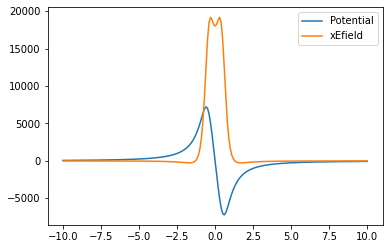

In [4]:
q  = np.array([[1.e-6, -1.e-6]])
xq = np.array([[-1,1]])
yq = np.array([[0,0]])
yrange = np.arange(-10, 10.1, .1)

potlist = []
xfieldlist = []

for y in yrange:
    potlist.append(potential(y, y,  q, xq, yq))
    xfieldlist.append(Efield(y, y , q, xq, yq)[0])
    
plt.plot(yrange, potlist, label = 'Potential')
plt.plot(yrange, xfieldlist, label = 'xEfield')

plt.legend()
plt.show()

Exercise 2.1

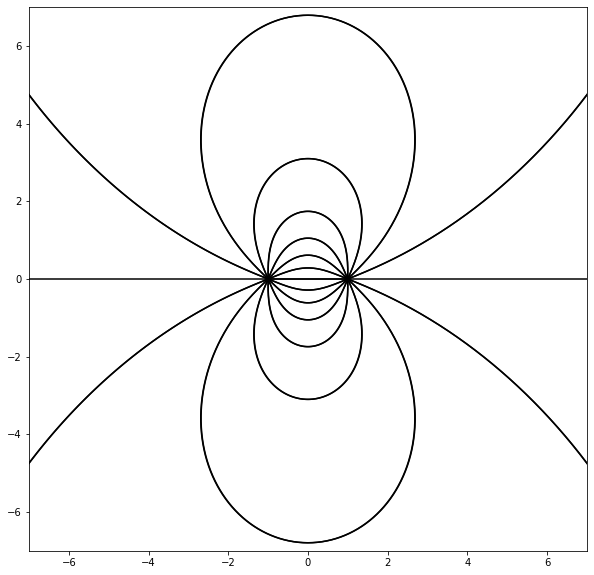

In [4]:
q  = np.array([[1.e-6, -1.e-6]])
xq = np.array([[-1,1]])
yq = np.array([[0,0]])

plotfullfieldlines(q, xq, yq, 16)


Exercise 2.2

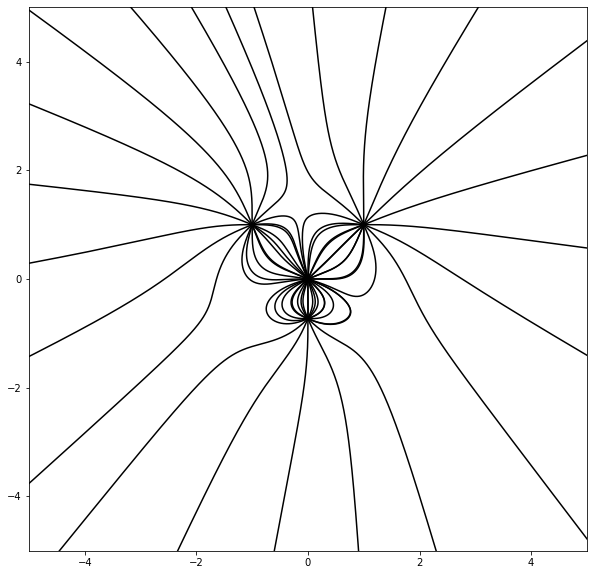

In [11]:
q  = np.array([[2e-6, -1e-6, -2e-6, -1e-6]])
xq = np.array([[0, -1, 1, 0]])
yq = np.array([[0, 1, 1, -.73]])

plotfullfieldlines(q, xq, yq, 16)

Question 2.3

In [ ]:
#Equipotentials in middle only produce straight verticle lines
q  = np.array([[1.e-6, -1.e-6]])
xq = np.array([[-1,1]])
yq = np.array([[0,0]])

ylist = np.arange(-.9, 1, .1)
for y in ylist:
    xeqpot, yeqpot = compute_equipotential_line(0, y, q, xq, yq, 1)
    plt.plot(xeqpot, yeqpot)
plt.show()

Exercise 2.3

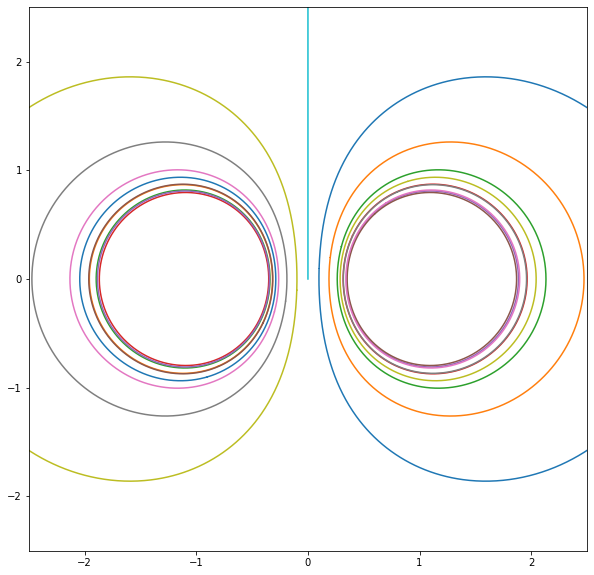

In [67]:
#Equipotentials in middle only produce straight verticle lines 2.3
q  = np.array([[1.e-6, -1.e-6]])
xq = np.array([[-1,1]])
yq = np.array([[0,0]])

ylist = np.arange(-.9, 1, .1)

plt.figure(figsize=(10,10)) 
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))


for y in ylist:
    xeqpot, yeqpot = compute_equipotential_line(y, y, q, xq, yq, 1)
    plt.plot(xeqpot, yeqpot)
plt.show()

Exercise 2.4

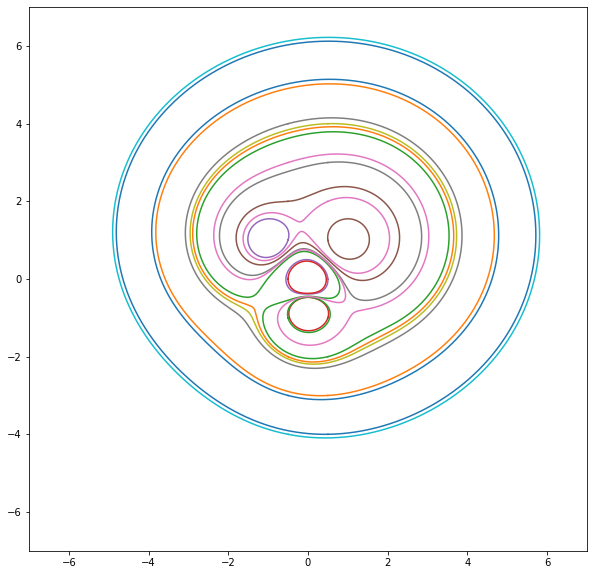

In [73]:
q  = np.array([[2e-6, -1e-6, -2e-6, -1e-6]])
xq = np.array([[0, -1, 1, 0]])
yq = np.array([[0, 1, 1, -.73]])

ylist = np.arange(-4, 5, 1)

plt.figure(figsize=(10,10)) 
plt.xlim((-7, 7))
plt.ylim((-7, 7))


for y in ylist:
    xeqpot, yeqpot = compute_equipotential_line(.5, y, q, xq, yq, 1)
    plt.plot(xeqpot, yeqpot)

for y in ylist:
    xeqpot, yeqpot = compute_equipotential_line(-.5, y, q, xq, yq, 1)
    plt.plot(xeqpot, yeqpot)

plt.show()

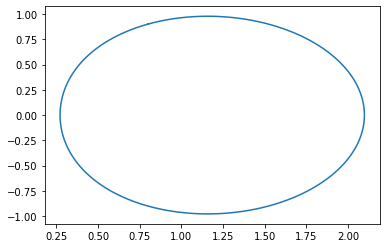

In [65]:
xeqpot, yeqpot = compute_equipotential_line(.8, .9, q, xq, yq, 1)
plt.plot(xeqpot, yeqpot)

In [41]:
ylist

array([-9.00000000e-01, -8.00000000e-01, -7.00000000e-01, -6.00000000e-01,
       -5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
       -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,
        3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
        7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [21]:
xfieldline, yfieldline = compute_field_line(2, 1, q, xq, yq, 1)

3.141592653589793

In [22]:
plt.plot(xfieldline, yfieldline)

1

In [26]:
print('charge %{n}', format(1))

charge %{n} 1
